In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn import preprocessing
from sklearn import utils

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./E:/KhaiPhaDuLieu/Me/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [191]:
spamEmail = pd.read_csv('./data/spam_email.csv')

spamEmail.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [192]:
data = np.array(spamEmail.iloc[:, :-1])
data

array([[0.000e+00, 0.000e+00, 2.900e-01, ..., 1.666e+00, 1.000e+01,
        1.800e+02],
       [4.600e-01, 0.000e+00, 0.000e+00, ..., 1.510e+00, 1.000e+01,
        7.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.718e+00, 1.100e+01,
        5.500e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.687e+00, 1.000e+01,
        2.700e+01],
       [1.300e-01, 2.600e-01, 5.200e-01, ..., 7.138e+00, 1.490e+02,
        1.235e+03]])

In [193]:
X = spamEmail[['make','address','all','3d','our', 'over', 'remove', 'internet', 'order','mail','receive','will','people','report','addresses','free'
               ,'business','email','you','credit','your','font','money','hp','hpl','george','650'
               ,'lab','labs','telnet','857','data','415','85','technology','1999','parts','pm','direct'
               ,'cs','meeting','original','project','re','edu','table','conference','semicol','paren','bracket'
               ,'bang','dollar','pound','cap_avg','cap_long','cap_total']]

X.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.0,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20


In [194]:
y = spamEmail['Class']

y.head()

0     ham
1     ham
2     ham
3    spam
4    spam
Name: Class, dtype: object

In [195]:
example_SpamEmail = spamEmail[(spamEmail['Class'] == 'ham') | (spamEmail['Class'] == 'spam')]

In [196]:
example_SpamEmail.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [197]:
example_SpamEmail['Label'] = example_SpamEmail['Class'].replace(to_replace = ['ham','spam'], value=[1,-1])

In [198]:
example_SpamEmail = example_SpamEmail.drop('Class', axis = 1)

In [199]:
example_SpamEmail['weight'] = 1/(example_SpamEmail.shape[0])

In [200]:
example_SpamEmail.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Label,weight
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.178,0.0,0.044,0.000,0.00,1.666,10,180,1,0.000217
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.125,0.0,0.000,0.000,0.00,1.510,10,74,1,0.000217
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,0.00,1.718,11,55,1,0.000217
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.159,0.0,0.069,0.221,0.11,3.426,72,819,-1,0.000217
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.0,0.263,0.000,0.00,1.428,4,20,-1,0.000217


In [201]:
random.seed(10)
example_SpamEmail_2 = example_SpamEmail.sample(len(example_SpamEmail), replace = True, weights = example_SpamEmail['weight'])
example_SpamEmail_2

,make,address,all,3d,our,over,remove,internet,order,mail,...,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Label,weight
2651,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.00,0.00,0.000,1.000,1,8,1,0.000217
875,1.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.00,0.00,0.000,1.250,3,30,1,0.000217
4192,0.00,0.59,0.00,0.00,0.00,0.00,0.59,0.00,0.0,0.59,...,0.257,0.000,0.00,0.00,0.000,8.586,66,249,-1,0.000217
774,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.341,0.000,0.00,0.00,0.341,3.166,7,57,1,0.000217
2151,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.00,0.00,0.000,5.500,10,11,1,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,0.16,0.16,0.16,0.00,0.83,0.16,0.00,0.16,0.0,0.00,...,0.058,0.000,0.00,0.00,0.000,1.901,16,135,1,0.000217
4588,0.00,0.00,0.00,0.14,0.42,0.00,0.00,0.14,0.0,0.00,...,0.077,0.000,0.00,0.00,0.000,1.502,6,257,1,0.000217
3432,0.58,0.00,0.00,0.00,2.33,0.00,1.16,0.00,0.0,0.00,...,0.270,0.000,0.09,0.09,0.000,1.829,9,75,-1,0.000217
1678,0.00,0.00,0.00,0.00,1.63,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.00,0.00,0.000,1.769,5,46,1,0.000217


In [202]:
X_train = example_SpamEmail_2.iloc[0:len(spamEmail),0:56]
y_train = example_SpamEmail_2.iloc[0:len(spamEmail),57]

[Text(0.5, 0.75, 'X[51] <= 0.082\ngini = 0.477\nsamples = 4601\nvalue = [1809, 2792]'),
 Text(0.25, 0.25, 'gini = 0.259\nsamples = 2719\nvalue = [415, 2304]'),
 Text(0.75, 0.25, 'gini = 0.384\nsamples = 1882\nvalue = [1394, 488]')]

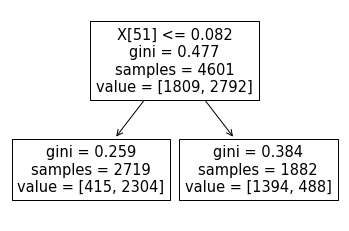

In [203]:
clfGini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clfGini.fit(X_train, y_train)
tree.plot_tree(clf)

In [204]:
#prediction
#Đưa test vào nên không lấy label
y_pred = clfGini.predict(example_SpamEmail.iloc[0:len(spamEmail),0:56])
y_pred

array([ 1,  1,  1, ...,  1, -1, -1], dtype=int64)

In [205]:
#adding a column weight after the first round of boosting
example_SpamEmail['PredictionClass'] = y_pred
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Label,weight,PredictionClass
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.044,0.000,0.00,1.666,10,180,1,0.000217,1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.00,1.510,10,74,1,0.000217,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.00,1.718,11,55,1,0.000217,1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.0,0.069,0.221,0.11,3.426,72,819,-1,0.000217,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.0,0.263,0.000,0.00,1.428,4,20,-1,0.000217,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.0,0.000,0.000,0.00,1.857,16,52,1,0.000217,1
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.221,0.665,0.00,3.812,15,61,-1,0.000217,-1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.00,1.000,1,3,1,0.000217,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.218,0.000,0.00,1.687,10,27,1,0.000217,-1


In [206]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
example_SpamEmail.loc[example_SpamEmail.Label != example_SpamEmail.PredictionClass, 'misclassification'] = 1
example_SpamEmail.loc[example_SpamEmail.Label == example_SpamEmail.PredictionClass, 'misclassification'] = 0

In [207]:
#error calculation
error1 = sum(example_SpamEmail['misclassification'] * example_SpamEmail['weight'])
error1

0.209084981525759

In [208]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha1 = 0.5*log((1-error1)/error1)
alpha1

0.6652248734732155

In [209]:
#update weight
newWeight = example_SpamEmail['weight']*np.exp(-1*alpha1*example_SpamEmail['Label']*example_SpamEmail['PredictionClass'])

In [210]:
#normalized weight
z = sum(newWeight)
normalizedWeight = newWeight/sum(newWeight)

In [211]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
example_SpamEmail['newWeight'] = round(normalizedWeight,4)
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,dollar,pound,cap_avg,cap_long,cap_total,Label,weight,PredictionClass,misclassification,newWeight
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.666,10,180,1,0.000217,1,0.0,0.0001
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.510,10,74,1,0.000217,1,0.0,0.0001
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.718,11,55,1,0.000217,1,0.0,0.0001
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.221,0.11,3.426,72,819,-1,0.000217,1,1.0,0.0005
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.00,1.428,4,20,-1,0.000217,-1,0.0,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.00,1.857,16,52,1,0.000217,1,0.0,0.0001
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.665,0.00,3.812,15,61,-1,0.000217,-1,0.0,0.0001
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.000,1,3,1,0.000217,1,0.0,0.0001
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.687,10,27,1,0.000217,-1,1.0,0.0005


In [212]:
#round 2
random.seed(20)
example_SpamEmail_2 = example_SpamEmail_2.sample(len(example_SpamEmail), replace = True, weights = example_SpamEmail['newWeight'])
example_SpamEmail_2 = example_SpamEmail_2.iloc[:,0:57]
#Đưa vào train thì chỉ đưa 15 thuộc tính phân loại
X_train = example_SpamEmail_2.iloc[0:len(spamEmail),0:56]
#y_train chứa thuộc tính mục tiêu nằm ở 16 binarylabel
y_train = example_SpamEmail.iloc[0:len(spamEmail),57]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#y_pred là dự đoán phân loại, predict đưa vào x test
y_pred = clf_gini.predict(example_SpamEmail.iloc[0:len(spamEmail),0:56])
#adding a column pred2 after the second round of boosting
example_SpamEmail['PredictionClass_2'] = y_pred

[Text(0.5, 0.75, 'X[26] <= 18.33\ngini = 0.478\nsamples = 4601\nvalue = [1813, 2788]'),
 Text(0.25, 0.25, 'gini = 0.476\nsamples = 4546\nvalue = [1779, 2767]'),
 Text(0.75, 0.25, 'gini = 0.472\nsamples = 55\nvalue = [34, 21]')]

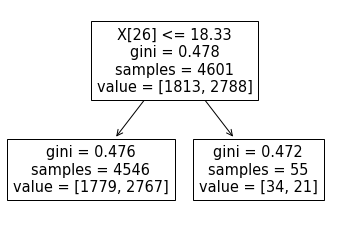

In [213]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [214]:
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,pound,cap_avg,cap_long,cap_total,Label,weight,PredictionClass,misclassification,newWeight,PredictionClass_2
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.666,10,180,1,0.000217,1,0.0,0.0001,1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.510,10,74,1,0.000217,1,0.0,0.0001,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.718,11,55,1,0.000217,1,0.0,0.0001,1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.11,3.426,72,819,-1,0.000217,1,1.0,0.0005,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.00,1.428,4,20,-1,0.000217,-1,0.0,0.0001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.00,1.857,16,52,1,0.000217,1,0.0,0.0001,1
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.812,15,61,-1,0.000217,-1,0.0,0.0001,1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.000,1,3,1,0.000217,1,0.0,0.0001,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.687,10,27,1,0.000217,-1,1.0,0.0005,1


In [215]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
example_SpamEmail.loc[example_SpamEmail.Label != example_SpamEmail.PredictionClass_2, 'misclassification2'] = 1
example_SpamEmail.loc[example_SpamEmail.Label == example_SpamEmail.PredictionClass_2, 'misclassification2'] = 0

In [216]:
#error calculation
error2 = sum(example_SpamEmail['misclassification2'] * example_SpamEmail['newWeight'])
error2

0.3620999999999909

In [217]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha2 = 0.5*log((1-error2)/error2)
alpha2

0.2831305572381768

In [218]:
#update weight
newWeight_2 = example_SpamEmail['newWeight']*np.exp(-1*alpha2*example_SpamEmail['Label']*example_SpamEmail['PredictionClass_2'])

In [219]:
#normalized weight
t = sum(newWeight_2)
normalizedWeight_2 = newWeight_2/sum(newWeight_2)

In [220]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
example_SpamEmail['newWeight_2'] = round(normalizedWeight_2,4)
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,cap_long,cap_total,Label,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,10,180,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,10,74,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,11,55,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,72,819,-1,0.000217,1,1.0,0.0005,1,1.0,0.0008
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,4,20,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,16,52,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,15,61,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0002
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,3,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,10,27,1,0.000217,-1,1.0,0.0005,1,0.0,0.0004


In [221]:
#round 3
random.seed(20)
example_SpamEmail_3 = example_SpamEmail.sample(len(example_SpamEmail), replace = True, weights = example_SpamEmail['newWeight_2'])
example_SpamEmail_3 = example_SpamEmail_3.iloc[:,0:57]
#Đưa vào train thì chỉ đưa 15 thuộc tính phân loại
X_train = example_SpamEmail_3.iloc[0:len(spamEmail),0:56]
#y_train chứa thuộc tính mục tiêu nằm ở 16 binarylabel
y_train = example_SpamEmail.iloc[0:len(spamEmail),57]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#y_pred là dự đoán phân loại, predict đưa vào x test
y_pred = clf_gini.predict(example_SpamEmail.iloc[0:len(spamEmail),0:56])
#adding a column pred2 after the second round of boosting
example_SpamEmail['PredictionClass_3'] = y_pred

[Text(0.5, 0.75, 'X[15] <= 4.595\ngini = 0.478\nsamples = 4601\nvalue = [1813, 2788]'),
 Text(0.25, 0.25, 'gini = 0.478\nsamples = 4567\nvalue = [1809, 2758]'),
 Text(0.75, 0.25, 'gini = 0.208\nsamples = 34\nvalue = [4, 30]')]

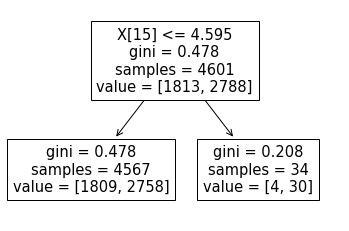

In [222]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [223]:
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,cap_total,Label,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2,PredictionClass_3
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,180,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,74,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,55,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,819,-1,0.000217,1,1.0,0.0005,1,1.0,0.0008,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,20,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,52,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,61,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0002,1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,3,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,27,1,0.000217,-1,1.0,0.0005,1,0.0,0.0004,1


In [224]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
example_SpamEmail.loc[example_SpamEmail.Label != example_SpamEmail.PredictionClass_3, 'misclassification3'] = 1
example_SpamEmail.loc[example_SpamEmail.Label == example_SpamEmail.PredictionClass_3, 'misclassification3'] = 0

In [225]:
#error calculation
error3 = sum(example_SpamEmail['misclassification'] * example_SpamEmail['newWeight_2'])
error3

0.5556000000000065

In [226]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha3 = 0.5*log((1-error3)/error3)
alpha3

-0.11166177655737014

In [227]:
#update weight
newWeight_3 = example_SpamEmail['newWeight_2']*np.exp(-1*alpha3*example_SpamEmail['Label']*example_SpamEmail['PredictionClass_3'])

In [228]:
#normalized weight
u = sum(newWeight_3)
normalizedWeight_3 = newWeight_3/sum(newWeight_3)

In [229]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
example_SpamEmail['newWeight_3'] = round(normalizedWeight_3,4)
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2,PredictionClass_3,misclassification3,newWeight_3
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000217,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000217,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000217,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.000217,1,1.0,0.0005,1,1.0,0.0008,1,1.0,0.0007
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000217,-1,0.0,0.0001,1,1.0,0.0002,1,1.0,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000217,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000217,-1,0.0,0.0001,1,1.0,0.0002,1,1.0,0.0002
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000217,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000217,-1,1.0,0.0005,1,0.0,0.0004,1,0.0,0.0004


In [230]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [231]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [232]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

# Create adaboost classifer object
spamEmailObject = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=1, n_estimators=50, random_state=0)

# Train Adaboost Classifer
modelSpamEmail = spamEmailObject.fit(X_train, y_train)

#Predict the response for test dataset
y_spamEmail = modelSpamEmail.predict(X_test)

In [233]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_spamEmail))

AdaBoost Classifier Model Accuracy: 0.9380771319934817


In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_spamEmail))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1100
           1       0.94      0.91      0.92       741

    accuracy                           0.94      1841
   macro avg       0.94      0.93      0.94      1841
weighted avg       0.94      0.94      0.94      1841



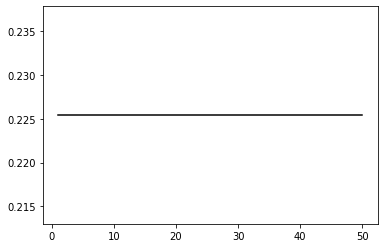

In [235]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, 50], [dt_stump_err] * 2, "k-", label="Decision Stump Error")

In [236]:
from sklearn.metrics import zero_one_loss

ada_train_error = np.zeros((50,), dtype=np.float64)
for i, y_pred in enumerate(modelSpamEmail.staged_predict(X_train)):
    ada_train_error[i] = zero_one_loss(y_pred, y_train)
    
test_score = np.zeros((50,), dtype=np.float64)
for i, y_pred in enumerate(modelSpamEmail.staged_predict(X_test)):
    test_score[i] = zero_one_loss(y_test, y_pred)

C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


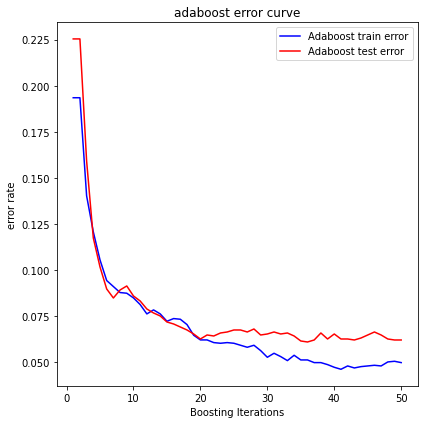

In [237]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("adaboost error curve")

plt.plot(
    np.arange(50) + 1,
    ada_train_error,
    "b-",
    label="Adaboost train error",
)

plt.plot(
    np.arange(50) + 1, test_score, "r-", label="Adaboost test error"
)


plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("error rate")
fig.tight_layout()
plt.show()